# 액티브 6번이랑 2번 다시 확인

- 산업코드차수가 10으로 표기된 것으로 보아 한국표준산업코드 10차를 기반으로 한 것 같음  
하지만 코드 데이터가 일치하지 않는 데이터들이 다수 있는것으로 확인됨

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import date, datetime, timedelta
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

---
# 데이터 불러오기
---

In [2]:
layout = pd.read_excel('/content/drive/MyDrive/Numble_Challenge/data/넘블 챌린지 개방데이터 레이아웃.xlsx')
codezip = pd.read_excel('/content/drive/MyDrive/Numble_Challenge/data/넘블 챌린지 개방데이터 코드집.xlsx')

# 액티브는 sheet 3개 (기업개요_외감 / 기업개요 / 휴폐업이력) 
active_ex = pd.read_excel('/content/drive/MyDrive/Numble_Challenge/data/액티브 중소법인 재무보유.xlsx', sheet_name = 0)
active_normal = pd.read_excel('/content/drive/MyDrive/Numble_Challenge/data/액티브 중소법인 재무보유.xlsx', sheet_name = 1)
active_history = pd.read_excel('/content/drive/MyDrive/Numble_Challenge/data/액티브 중소법인 재무보유.xlsx', sheet_name = 2)

# 휴페업은 sheet 2개 (기업개요 / 휴폐업이력)
close_normal = pd.read_excel('/content/drive/MyDrive/Numble_Challenge/data/휴폐업 중소법인 재무보유.xlsx',sheet_name = 0)
close_history = pd.read_excel('/content/drive/MyDrive/Numble_Challenge/data/휴폐업 중소법인 재무보유.xlsx',sheet_name = 1)

finance = pd.read_table('/content/drive/MyDrive/Numble_Challenge/data/재무데이터.txt', encoding = 'CP949')

In [3]:
print('#'*60)
print('액티브 중소법인 "기업개요_외감" 데이터셋 크기 :',active_ex.shape)
print('액티브 중소법인 "기업개요" 데이터셋 크기 :',active_normal.shape)
print('액티브 중소법인 "휴폐업이력" 데이터셋 크기 :',active_history.shape)
print('#'*60)
print('휴폐업 중소법인 "기업개요" 데이터셋 크기 :',close_normal.shape)
print('휴폐업 중소법인 "휴폐업이력" 데이터셋 크기 :',close_history.shape)
print('#'*60)
print('재무 데이터셋 크기: ',finance.shape)
print('#'*60)

############################################################
액티브 중소법인 "기업개요_외감" 데이터셋 크기 : (28982, 28)
액티브 중소법인 "기업개요" 데이터셋 크기 : (198651, 31)
액티브 중소법인 "휴폐업이력" 데이터셋 크기 : (4827, 5)
############################################################
휴폐업 중소법인 "기업개요" 데이터셋 크기 : (6739, 28)
휴폐업 중소법인 "휴폐업이력" 데이터셋 크기 : (6840, 5)
############################################################
재무 데이터셋 크기:  (109142, 46)
############################################################


----
# 액티브 중소법인 데이터 살펴보기
----

---
### 1. 컬럼명 한글로 변경
---

In [4]:
# nan 값 제외
eng = layout['영문칼럼명'].tolist()
len(eng)
kor = layout['한글칼럼명'].tolist()
len(kor)

43

In [ ]:
#CMP_NM1로 설정된 컬럼 수정
print('#'*100)
print(active_ex.columns)
print(active_normal.columns)
print(active_ex.shape)
print(active_normal.shape)
print('#'*100)
active_ex.rename(columns={'CMP_NM1':'CMP_NM'}, inplace=True)
del active_normal['CMP_NM1']
print('#'*100)
print(active_ex.columns)
print(active_normal.columns)
print(active_ex.shape)
print(active_normal.shape)
print('#'*100)

In [6]:
# 컬럼명이 일치하는 인덱스 확인
name_ex = active_ex.columns.tolist()

active_ex_list = []
for i in name_ex:
  try:
    active_ex_list.append(eng.index(i))
  except:
    pass

print(active_ex_list)
print(len(active_ex_list))
  
# 한글로 컬럼명 변경
for i in active_ex_list:
  active_ex = active_ex.rename(columns={eng[i] : kor[i]})

print(active_ex.columns)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
28
Index(['사업자등록번호', '기업접두명', '기업명', '기업접미명', '기업영문명', '업종', '기업규모',
       '공기업구분 1.공기업 2.일반기업', '개인법인구분 1.법인 2.개인', '본점지점구분 1.본점 2.지점',
       '국외투자법인여부', '벤처기업여부', '상장코드', '산업코드차수', '산업코드1', '산업코드2', '산업코드3',
       '공공기관유형', '중견기업보호여부', '본점기업코드', '설립일자', '설립구분', '상장일자', '주요사업내용', '국가명',
       '홈페이지URL', '대표자명', '직원수'],
      dtype='object')


In [7]:
# 컬럼명이 일치하는 인덱스 확인
name_normal = active_normal.columns.tolist()

active_normal_list = []
for i in name_normal:
  try:
    active_normal_list.append(eng.index(i))
  except:
    pass

print(active_normal_list)
print(len(active_normal_list))
  
# 한글로 컬럼명 변경
for i in active_normal_list:
  active_normal = active_normal.rename(columns={eng[i] : kor[i]})

print(active_normal.columns)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
28
Index(['사업자등록번호', '기업접두명', '기업명', '기업접미명', '기업영문명', '업종', 'CMP_TYP', '기업규모',
       '공기업구분 1.공기업 2.일반기업', '개인법인구분 1.법인 2.개인', '본점지점구분 1.본점 2.지점',
       '국외투자법인여부', '벤처기업여부', '상장코드', '산업코드차수', '산업코드1', '산업코드2', '산업코드3',
       '공공기관유형', '중견기업보호여부', 'TAXN_TYP', '본점기업코드', '설립일자', '설립구분', '상장일자',
       '주요사업내용', '국가명', '홈페이지URL', '대표자명', '직원수'],
      dtype='object')


---
### 2. 두 데이터 중 컬럼 다른 것은 무엇인가?
---
    'CMP_TYP', 'TAXN_TYP' 가 차이가 존재

    CMP_TYP = 기업형태
    TAXN_TYP = 과세 유형
    

In [8]:
a = []
for i in active_ex.columns:
  a.append(i)
b = []
for j in active_normal.columns:
  b.append(j)
print(len(a))
print(len(b))

c = []
for i in range(len(b)):
  if b[i] not in a:
    c.append(b[i])
print(c)

28
30
['CMP_TYP', 'TAXN_TYP']


---
### 3. 기업개요_외감에 있는 기업들이 기업개요에 포함이 되는가?
---
    불일치하는 데이터는 없음   
    즉 모두 포함이 되어 있음


In [9]:
ex_list = active_ex['사업자등록번호'].tolist()
normal_list = active_normal['사업자등록번호'].tolist()
print('액티브 기업개요_외감의 중소기업 수:',len(ex_list))
print('액티브 기업개요의 중소기업 수:',len(normal_list))


inconsistent = []
for i in range(len(ex_list)):
  if ex_list[i] not in normal_list:
    inconsistent.append(ex_list[i])

print('불일치하는 데이터 수:',len(inconsistent))

액티브 기업개요_외감의 중소기업 수: 28982
액티브 기업개요의 중소기업 수: 198651
불일치하는 데이터 수: 0


---
### 4. 그렇다면 내용도 일치 하는가?
---
    1차 적으로 확인 하니 완벽하게 일치하지 않으며 약 2천여개만 내용까지 일치

In [10]:
test = active_normal.copy()
del test['CMP_TYP'], test['TAXN_TYP']
test.shape

(198651, 28)

In [11]:
print(active_ex.duplicated().sum())
print(test.duplicated().sum())

0
0


In [97]:
print('#'*60)
print('합치기 전 기업개요_외감 사이즈:',len(active_ex))
print('합치기 전 기업개요 사이즈:',len(test))
print('#'*60)
test_concat = pd.concat([active_ex,test], ignore_index = True)
print('합친 후 총 사이즈:',len(test_concat))
print('#'*60)
print('중복 사이즈:', test_concat.duplicated().sum())
test_concat = test_concat.drop_duplicates()
print('중복제거 후 총 사이즈:',len(test_concat))
print('#'*60)

############################################################
합치기 전 기업개요_외감 사이즈: 28982
합치기 전 기업개요 사이즈: 35721
############################################################
합친 후 총 사이즈: 64703
############################################################
중복 사이즈: 0
중복제거 후 총 사이즈: 64703
############################################################


---
### 5. 오늘자로 부터 설입일자를 뺀 후 기업존속기간을 일자로 계산
---
- 오기입처럼 보이는 데이터들이 있어서 1950년 이후의 데이터들만 계산

---
#### 5-1 "기업개요_외감"   
---
    가장 오래된 기업의 일자: 26493일
    가장 짧은 기업의 일자: 91일

  

In [13]:
active_ex['설립일자'].isnull().sum()

1074

In [14]:
# 현 float64 형태를 str로 변경 해줘야 됨
# 빈 값들을 살려주기 위해 -1로 변환 후 다시 공백 변환
active_ex['설립일자'] = active_ex['설립일자'].fillna(-1).astype('int64').replace({-1:None})

# 1950년 보다 작게 설정된 값들은 오기입 으로 간주하고 모두 Null(-1)값으로 변환
for i in range(len(active_ex)):
  try:
    if active_ex['설립일자'][i] < 19500000 :
      active_ex['설립일자'][i] = -1
  except:
    pass

active_ex['설립일자'] = active_ex['설립일자'].fillna(-1).astype('str').replace({'-1':None})

In [15]:
# 데에티 중 20000700과 같이 일자가 00으로 체크된 데이터 01로 임의로 변경
for i in range(len(active_ex)):
  try:
    if active_ex['설립일자'][i][-2 : ] == '00':
      active_ex['설립일자'][i] = active_ex['설립일자'][i][:-2] + '01'
  except:
    pass
active_ex['설립일자'] = pd.to_datetime(active_ex['설립일자'],format='%Y-%m-%d')

In [16]:
active_ex['존속기간'] = None
today = datetime.now()
now_day = f'{today.year}{today.month}{today.day}'
# now_day = '20221027'
date_0 = datetime.strptime(now_day, '%Y%m%d')

for i in range(len(active_ex)):
  active_ex['존속기간'][i] = (date_0 - active_ex['설립일자'][i]).days

In [17]:
print('가장 오래된 기업의 일자:',active_ex['존속기간'].max())
print('가장 짧은 기업의 일자:',active_ex['존속기간'].min())
print('현재 기업 평균:',round(active_ex['존속기간'].mean()))

가장 오래된 기업의 일자: 26493
가장 짧은 기업의 일자: 91
현재 기업 평균: 6626


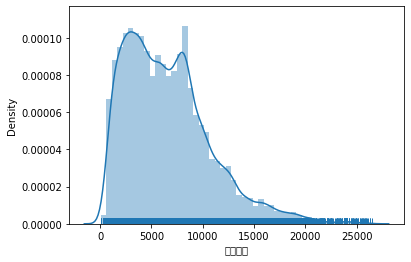

In [18]:
sns.distplot(active_ex['존속기간'], kde=True, rug=True)

---
#### 5-2 "기업개요"
---
    가장 오래된 기업의 일자: 26544일
    가장 짧은 기업의 일자: 65일

In [19]:
active_normal['설립일자'].isnull().sum()

1574

In [20]:
# 현 float64 형태를 str로 변경 해줘야 됨
# 빈 값들을 살려주기 위해 -1로 변환 후 다시 공백 변환
active_normal['설립일자'] = active_normal['설립일자'].fillna(-1).astype('int64').replace({-1:None})

# 1950년 보다 작게 설정된 값들은 오기입 으로 간주하고 모두 Null(-1)값으로 변환
for i in range(len(active_normal)):
  try:
    if active_normal['설립일자'][i] < 19500000 :
      active_normal['설립일자'][i] = -1
  except:
    pass

active_normal['설립일자'] = active_normal['설립일자'].fillna(-1).astype('str').replace({"-1":None})

In [21]:
# 데에티 중 20000700과 같이 일자가 00으로 체크된 데이터 01로 임의로 변경
for i in range(len(active_normal)):
  try:
    if active_normal['설립일자'][i][-2 : ] == '00':
      active_normal['설립일자'][i] = active_normal['설립일자'][i][:-2] + '01'
  except:
    pass
active_normal['설립일자'] = pd.to_datetime(active_normal['설립일자'],format='%Y-%m-%d')

In [22]:
active_normal['존속기간'] = None
today = datetime.now()
now_day = f'{today.year}{today.month}{today.day}'
# now_day = '20221027'
date_0 = datetime.strptime(now_day, '%Y%m%d')

for i in range(len(active_normal)):
  active_normal['존속기간'][i] = (date_0 - active_normal['설립일자'][i]).days

In [23]:
print('가장 오래된 기업의 일자:',active_normal['존속기간'].max())
print('가장 짧은 기업의 일자:',active_normal['존속기간'].min())
print('현재 기업 평균:',round(active_normal['존속기간'].mean()))

가장 오래된 기업의 일자: 26544
가장 짧은 기업의 일자: 65
현재 기업 평균: 4788


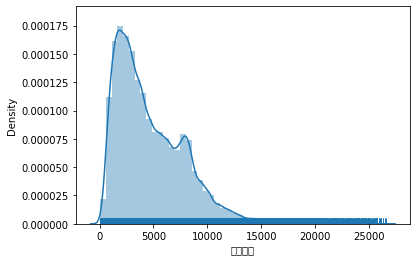

In [24]:
sns.distplot(active_normal['존속기간'], kde=True, rug=True)

---
### 6. 액티브 휴폐업이력 확인
---
- CLSBZ_GB
  - 1 = 부도
  - 2 = 휴업
  - 3 = 폐업
  - 4 = 피합병
  - 5 = 휴업취소
  - 6 = 폐업취소


    외감을 받는 기업은 자산총액이 120억 넘는 회사이기 때문에 휴폐업의 가능성이 더 적다는 것을 알 수 있다

In [36]:
for i in range(len(active_history)):
  if active_history['END_DATE'][i] == 99991231:
    active_history['END_DATE'][i] = 20221027


In [38]:
active_history['END_DATE'] = active_history['END_DATE'].astype('str')
active_history['STRT_DATE'] = active_history['STRT_DATE'].astype('str')

active_history['END_DATE'] = pd.to_datetime(active_history['END_DATE'],format='%Y-%m-%d')
active_history['STRT_DATE'] = pd.to_datetime(active_history['STRT_DATE'],format='%Y-%m-%d')

In [45]:
active_history['CLOSE_DATE'] = None 

for i in range(len(active_history)):
  active_history['CLOSE_DATE'][i] = (active_history['STRT_DATE'][i] - active_history['END_DATE'][i]).days

In [ ]:
active_history

In [25]:
ah = active_history['BIZ_NO'].tolist()
ae = active_ex['사업자등록번호'].tolist()
an = active_normal['사업자등록번호'].tolist()

print('액티브 "휴폐업" 데이터 수:',len(ah))
print('액티브 "기업개요_외감" 총 데이터 수:',len(ae))
print('액티브 "기업개요" 총 데이터 수:',len(an))
print('#'*60)

ah_ae = []
ah_an = []
for i in range(len(ah)):
  if ah[i] not in ae :
    ah_ae.append(ah[i])
  if ah[i] not in an:
    ah_an.append(ah[i])

print('휴폐업 데이터 중 "기업개요_외감"과 일치하지 않는 데이터 수:',len(ah_ae))
print('휴폐업 데이터 중 "기업개요"와 일치하지 않는 데이터 수:',len(ah_an))

액티브 "휴폐업" 데이터 수: 4827
액티브 "기업개요_외감" 총 데이터 수: 28982
액티브 "기업개요" 총 데이터 수: 198651
############################################################
휴폐업 데이터 중 "기업개요_외감"과 일치하지 않는 데이터 수: 3963
휴폐업 데이터 중 "기업개요"와 일치하지 않는 데이터 수: 0


---
### 7. 기업개요_외감에 있는 기업들이 재무제표 데이터에도 있는가?
---
    기업개요_외감에 있는 28982개의 기업들의 재무제표는  
    재무제표 데이터에 모두 들어있음을 확인

In [50]:
active_count = 0

for i in range(len(active_ex)):
  try:
    number = active_ex['사업자등록번호'][i]
    finance.query(f"사업자번호 == {number}")
    active_count += 1
  except:
    pass
print('액티브 "기업개요_외감"의 총 숫자:',len(active_ex))
print('액티브 "기업개요_외감"에 들어있는 기업들이 재무재표 데이터에 등록된 데이터 수:',active_count)

액티브 "기업개요_외감"의 총 숫자: 28982
액티브 "기업개요_외감" 중 재무재표에 등록된 데이터 수: 28982


---
### 8. 기타
---

---
- 개인법인 구분에서 개인 데이터만 존재
---

In [93]:
# Null값은 없음
active_normal['개인법인구분 1.법인 2.개인'].isnull().sum()

0

In [86]:
print('#'*70)
print(len(active_normal))
print(active_normal['개인법인구분 1.법인 2.개인'].value_counts())
print('#'*70)
print(len(active_ex))
print(active_ex['개인법인구분 1.법인 2.개인'].value_counts())
print('#'*70)

198651
1    198651
Name: 개인법인구분 1.법인 2.개인, dtype: int64
######################################################################
28982
1    28982
Name: 개인법인구분 1.법인 2.개인, dtype: int64


---
- "기업개요_외감" 데이터에서 본지점 구분에서는 본점의 비율이 앞도적으로 높다
---
    본점 : 26070
    분점 : 2912

In [96]:
# Null값은 없음
print('#'*70)
print('Null값의 수:',active_ex['본점지점구분 1.본점 2.지점'].isnull().sum())
print('#'*70)
print(active_ex['본점지점구분 1.본점 2.지점'].value_counts())
print('#'*70)

0
1    26070
2     2912
Name: 본점지점구분 1.본점 2.지점, dtype: int64


---
- "기업개요" 데이터에서 본지점 구분에서는 본점의 비율이 앞도적으로 높다
---
    본점 : 193740
    분점 : 4911

In [95]:
# Null값은 없음
print('#'*70)
print('Null값의 수:',active_normal['본점지점구분 1.본점 2.지점'].isnull().sum())
print('#'*70)
print(active_normal['본점지점구분 1.본점 2.지점'].value_counts())
print('#'*70)

0
1    193740
2      4911
Name: 본점지점구분 1.본점 2.지점, dtype: int64


---
- "기업개요_외감" 데이터에서 벤처기업 여부는 아닌 경우가 대부분이다.
---
    벤처기업 O: 2812
    벤처기업 X: 26170

In [100]:
# Null값은 없음
print('#'*70)
print('Null값의 수:',active_ex['벤처기업여부'].isnull().sum())
print('#'*70)
print(active_ex['벤처기업여부'].value_counts())
print('#'*70)

0
N    26170
Y     2812
Name: 벤처기업여부, dtype: int64


---
- "기업개요" 데이터에서 벤처기업 여부는 아닌 경우가 대부분이다.
---
    벤처기업 O: 27809
    벤처기업 X: 170842

In [101]:
# Null값은 없음
print('#'*70)
print('Null값의 수:',active_normal['벤처기업여부'].isnull().sum())
print('#'*70)
print(active_normal['벤처기업여부'].value_counts())
print('#'*70)

0
N    170842
Y     27809
Name: 벤처기업여부, dtype: int64


---
# 휴폐업 데이터 살펴보기
---

---
### 1. 컬럼명 한글로 변경
---

In [53]:
# 컬럼명이 일치하는 인덱스 확인
close_name = close_normal.columns.tolist()


close_list = []
for i in close_name:
  try:
    close_list.append(eng.index(i))
  except:
    pass

print(close_list)
print(len(close_list))
  
# 한글로 컬럼명 변경
for i in close_list:
  close_normal = close_normal.rename(columns={eng[i] : kor[i]})

print(close_normal.columns)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
28
Index(['사업자등록번호', '기업접두명', '기업명', '기업접미명', '기업영문명', '업종', '기업규모',
       '공기업구분 1.공기업 2.일반기업', '개인법인구분 1.법인 2.개인', '본점지점구분 1.본점 2.지점',
       '국외투자법인여부', '벤처기업여부', '상장코드', '산업코드차수', '산업코드1', '산업코드2', '산업코드3',
       '공공기관유형', '중견기업보호여부', '본점기업코드', '설립일자', '설립구분', '상장일자', '주요사업내용', '국가명',
       '홈페이지URL', '대표자명', '직원수'],
      dtype='object')


---
### 2. 기업개요에 있는 기업들이 재무제표 데이터에도 있는가?
---

    기업개요에 있는 6739개의 기업들의 재무제표는  
    재무제표 데이터에 모두 들어있음을 확인
    

In [55]:
close_count = 0

for i in range(len(close_normal)):
  try:
    number = close_normal['사업자등록번호'][i]
    finance.query(f"사업자번호 == {number}")
    close_count += 1
  except:
    pass
print('휴폐업 중소법인 재무보유.xlsx의 총 숫자:',len(close_normal))
print('휴페업 데이터 안에 기업 중 재무재표에 등록된 데이터 수:',close_count)

휴폐업 중소법인 재무보유.xlsx의 총 숫자: 6739
휴페업 데이터 안에 기업 중 재무재표에 등록된 데이터 수: 6739


---
### 3. 액티브 "기업개요_외감" 과 "휴페업" 중복 확인 (사업자번호 기준)
---

    액티브 + 휴페업 = 35721  
    재무제표 데이터 중복제거 = 35709  

    액티브 "기업개요_외감" 과 "휴폐업"의 사업자등록번호를 기준으로 재무제표에 들어있는지 확인 했을 때에는 모두 빠짐없이 들어있음을 확인하였다  
    재무제표의 중복을 제거한 갯수와 위의 2개를 합친 갯수가 일치하지 않는다  
      

    12개는 무엇?

In [59]:
print('중복제거 전 사업자번호 등록 수:',len(finance['사업자번호'].tolist()))
print('중복제거 후 사업자번호 등록 수:',len(set(finance['사업자번호'].tolist())))

중복제거 전 사업자번호 등록 수: 109142
중복제거 후 사업자번호 등록 수: 35709


---
- 액티브와 휴페업의 중복 데이터 확인1
---

In [63]:
qq = set(finance['사업자번호'].tolist())

count = 0
for i in range(len(active_ex)):
  if active_ex['사업자등록번호'][i] not in qq :
    count += 0 
print(count)

for j in range(len(close_normal)):
  if close_normal['사업자등록번호'][j] not in qq:
    count += 0
print(count)

0
0


---
- 액티브와 휴페업의 중복 데이터 확인2
---

In [77]:
test = pd.concat([close_normal['사업자등록번호'], active_ex['사업자등록번호']], ignore_index = True)
print(len(set(test)))
print(test.isnull().sum())

35721
0


In [79]:
close_normal['개인법인구분 1.법인 2.개인'].value_counts()

1    6739
Name: 개인법인구분 1.법인 2.개인, dtype: int64

In [81]:
active_ex.shape

(28982, 29)

In [ ]:
close_history[close_history['STRT_DATE'] != close_history['STAT_OCR_DATE']]